In [1]:
!pip install opencv-python matplotlib imageio gdown

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)


In [3]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
beautifulsoup4               4.12.3
Bottleneck                   1.4.2
cachetools                   5.5.0
certifi                      2024.8.30
charset-normalizer           3.4.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.0
cycler                       0.11.0
debugpy                      1.8.8
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
filelock                     3.13.1
flatbuffers                  24.3.25
fonttools                    4.51.0
fsspec                       2024.6.1
gast                         0.4.0
gdown                        5.2.0
gmpy2                        2.1.2
google-auth                  2.36.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

## **Data Loading Functions**

In [3]:
import gdown

In [5]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=2d6326a2-8b94-4a57-8aaa-9d2432766c5d
To: c:\Users\RoboticLab\Desktop\LipReading\data.zip
100%|██████████| 423M/423M [01:40<00:00, 4.21MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [86]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    frames = tf.cast(frames, tf.float32)
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(frames)
    normalized_frames = (frames - mean) / std
    return normalized_frames

In [87]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [88]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The Vocabulary is: {char_to_num.get_vocabulary()}"
    f"(size = {char_to_num.vocabulary_size()})"
)

The Vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '](size = 40)


In [89]:
char_to_num(['a', 'b', 'c', 'd'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 2, 3, 4], dtype=int64)>

In [90]:
num_to_char([1, 2, 3, 4])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'a', b'b', b'c', b'd'], dtype=object)>

In [91]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens, ' ', line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [92]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [93]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [94]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [95]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

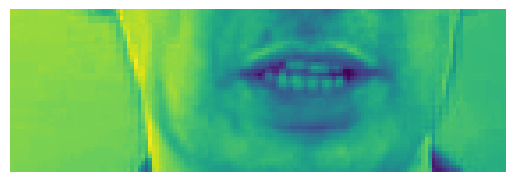

In [96]:
plt.imshow(frames[40])
plt.axis('off')
plt.show()

In [97]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [98]:
print([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

['b', 'i', 'n', ' ', 'b', 'l', 'u', 'e', ' ', 'a', 't', ' ', 'l', ' ', 's', 'i', 'x', ' ', 'n', 'o', 'w']


In [99]:
def mappable_function(path:str) -> List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

___

## **Create Data Pipeline**

In [100]:
from matplotlib import pyplot as plt

In [101]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [102]:
len(test)

50

In [103]:
frames, alignments = data.as_numpy_iterator().next()

In [104]:
len(frames)

2

In [105]:
sample = data.as_numpy_iterator()

In [106]:
val = sample.next(); val[0]

array([[[[[ 1.3321927 ],
          [ 1.3321927 ],
          [ 1.3732258 ],
          ...,
          [-0.06293667],
          [-0.06293667],
          [-0.06293667]],

         [[ 1.3321927 ],
          [ 1.3321927 ],
          [ 1.3732258 ],
          ...,
          [-0.06293667],
          [-0.06293667],
          [-0.06293667]],

         [[ 1.3732258 ],
          [ 1.3732258 ],
          [ 1.3732258 ],
          ...,
          [-0.02190346],
          [-0.02190346],
          [-0.02190346]],

         ...,

         [[ 0.9628937 ],
          [ 0.9628937 ],
          [ 0.9628937 ],
          ...,
          [-0.30913597],
          [-0.30913597],
          [-0.30913597]],

         [[ 0.9218605 ],
          [ 0.9218605 ],
          [ 0.9218605 ],
          ...,
          [-0.35016918],
          [-0.35016918],
          [-0.35016918]],

         [[ 0.9218605 ],
          [ 0.9218605 ],
          [ 0.9218605 ],
          ...,
          [-0.35016918],
          [-0.35016918],
          

In [110]:
val[0].shape

(2, 75, 46, 140, 1)

In [113]:
imageio.mimsave('./animation.gif', val[0][2:], fps=10)